<a href="https://colab.research.google.com/github/saro0307/Generative-AI-for-Space-Based-Architecture/blob/main/GenAI_for_Space_Based_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Data Preprocessing and Analysis

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Example planetary data (temperature, radiation level, gravity, resource availability)
data = {
    "planet": ["Mars", "Moon", "Europa", "Titan"],
    "temperature": [-60, -20, -160, -180],  # Celsius
    "radiation": [0.6, 0.8, 1.2, 0.4],      # Arbitrary units
    "gravity": [3.71, 1.62, 1.315, 1.352],  # m/s^2
    "resources": [0.8, 0.4, 0.3, 0.5]       # Availability scale (0 to 1)
}
df = pd.DataFrame(data)

# Normalizing features
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.drop(columns=["planet"]))
df_normalized = pd.DataFrame(normalized_data, columns=["temperature", "radiation", "gravity", "resources"])
df_normalized["planet"] = df["planet"]
print(df_normalized)


   temperature  radiation   gravity  resources  planet
0        0.750       0.25  1.000000        1.0    Mars
1        1.000       0.50  0.127349        0.2    Moon
2        0.125       1.00  0.000000        0.0  Europa
3        0.000       0.00  0.015449        0.4   Titan


GAN Model for Habitat Generation

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# GAN Training Loop
def train_gan(generator, discriminator, epochs, input_dim, output_dim, batch_size=16):
    criterion = nn.BCELoss()
    optimizer_G = optim.Adam(generator.parameters(), lr=0.001)
    optimizer_D = optim.Adam(discriminator.parameters(), lr=0.001)

    for epoch in range(epochs):
        # Generate fake habitat features
        noise = torch.randn(batch_size, input_dim)
        generated_data = generator(noise)

        # Discriminator on real and fake data
        real_data = torch.randn(batch_size, output_dim)  # Placeholder for real data
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = criterion(discriminator(real_data), real_labels)
        fake_loss = criterion(discriminator(generated_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        g_loss = criterion(discriminator(generated_data), real_labels)  # Flip labels
        g_loss.backward()
        optimizer_G.step()

        if epoch % 100 == 0:
            print(f"Epoch {epoch} | D Loss: {d_loss.item()} | G Loss: {g_loss.item()}")

input_dim = 10  # Latent space dimension
output_dim = 4  # Habitat feature dimensions (e.g., space, material, durability, sustainability)
generator = Generator(input_dim, output_dim)
discriminator = Discriminator(output_dim)

train_gan(generator, discriminator, epochs=1000, input_dim=input_dim, output_dim=output_dim)


Epoch 0 | D Loss: 1.3816813230514526 | G Loss: 0.6747321486473083
Epoch 100 | D Loss: 0.7826583981513977 | G Loss: 1.714840292930603
Epoch 200 | D Loss: 0.4704660177230835 | G Loss: 2.0285322666168213
Epoch 300 | D Loss: 1.3306270837783813 | G Loss: 1.2156459093093872
Epoch 400 | D Loss: 0.24299630522727966 | G Loss: 5.46169376373291
Epoch 500 | D Loss: 0.8441115617752075 | G Loss: 1.3749685287475586
Epoch 600 | D Loss: 0.36474642157554626 | G Loss: 2.9515135288238525
Epoch 700 | D Loss: 0.3841858506202698 | G Loss: 2.3549492359161377
Epoch 800 | D Loss: 1.4793542623519897 | G Loss: 1.8119971752166748
Epoch 900 | D Loss: 0.22790297865867615 | G Loss: 2.4635651111602783


Simulation with FEA (Finite Element Analysis)

In [3]:
def check_environmental_conditions(gravity, temperature, radiation):
    # Placeholder values
    gravity_limit = 3.5
    temp_min, temp_max = -150, 50  # Habitat's operational temperature range

    # Check gravity compatibility
    if gravity > gravity_limit:
        print("Warning: High gravity level; modify structure.")
    else:
        print("Gravity conditions acceptable.")

    # Check temperature compatibility
    if not (temp_min <= temperature <= temp_max):
        print("Warning: Extreme temperature; apply extra insulation.")
    else:
        print("Temperature conditions acceptable.")

    # Check radiation levels
    if radiation > 0.7:
        print("Warning: High radiation; apply extra shielding.")
    else:
        print("Radiation levels acceptable.")

# Example check for Mars
check_environmental_conditions(gravity=3.71, temperature=-60, radiation=0.6)


Temperature conditions acceptable.
Radiation levels acceptable.


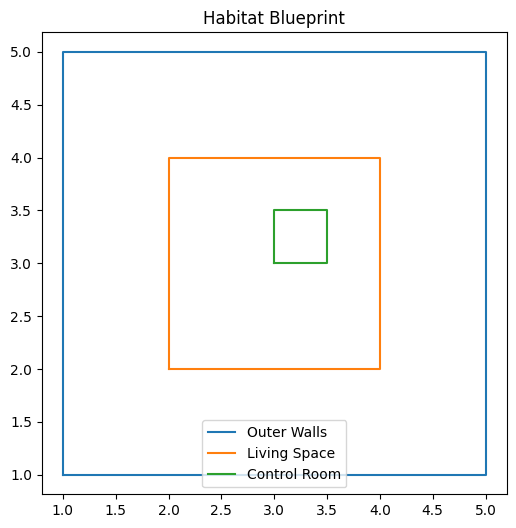

In [4]:
import matplotlib.pyplot as plt

def draw_habitat():
    # Example blueprint for a habitat with rooms, corridors, and insulation layers
    plt.figure(figsize=(6,6))
    plt.plot([1, 5, 5, 1, 1], [1, 1, 5, 5, 1], label="Outer Walls")
    plt.plot([2, 4, 4, 2, 2], [2, 2, 4, 4, 2], label="Living Space")
    plt.plot([3, 3.5, 3.5, 3, 3], [3, 3, 3.5, 3.5, 3], label="Control Room")

    plt.legend()
    plt.title("Habitat Blueprint")
    plt.axis('equal')
    plt.show()

draw_habitat()


Rendering Blueprints (Placeholder for 3D Modeling)

UI with flask

In [6]:
from flask import Flask, render_template, request, jsonify

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')  # Create an HTML page for user inputs

@app.route('/generate_habitat', methods=['POST'])
def generate_habitat():
    # Retrieve user inputs for habitat design
    data = request.get_json()
    planet = data['planet']
    gravity = data['gravity']
    temperature = data['temperature']
    radiation = data['radiation']

    # Run AI model and simulations
    habitat_design = generator(torch.randn(1, input_dim)).detach().numpy()
    check_environmental_conditions(gravity, temperature, radiation)

    # Return generated design as JSON
    return jsonify({"habitat_design": habitat_design.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
